In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
datos = pd.read_csv('arboles.csv')
datos.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [8]:
X = sm.add_constant(datos[['Girth', 'Height']])
y = datos['Volume']
M1 = sm.OLS(y, X).fit()
print(M1.summary())

##                coef    std err          t      P>|t|      [0.025      0.975]
##const        -57.9877      8.638     -6.713      0.000     -75.682     -40.293
##Girth          4.7082      0.264     17.816      0.000       4.167       5.249
##Height         0.3393      0.130      2.607      0.014       0.073       0.606
## Los coeficientes coinciden con los obtenidos con R

datos['y_pred'] = M1.predict(X)
datos.head()

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     255.0
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           1.07e-18
Time:                        02:50:28   Log-Likelihood:                -84.455
No. Observations:                  31   AIC:                             174.9
Df Residuals:                      28   BIC:                             179.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.9877      8.638     -6.713      0.0

,Girth,Height,Volume,y_pred
0,8.3,70,10.3,4.837660
1,8.6,65,10.3,4.553852
2,8.8,63,10.2,4.816981
3,10.5,72,16.4,15.874115
4,10.7,81,18.8,19.869008


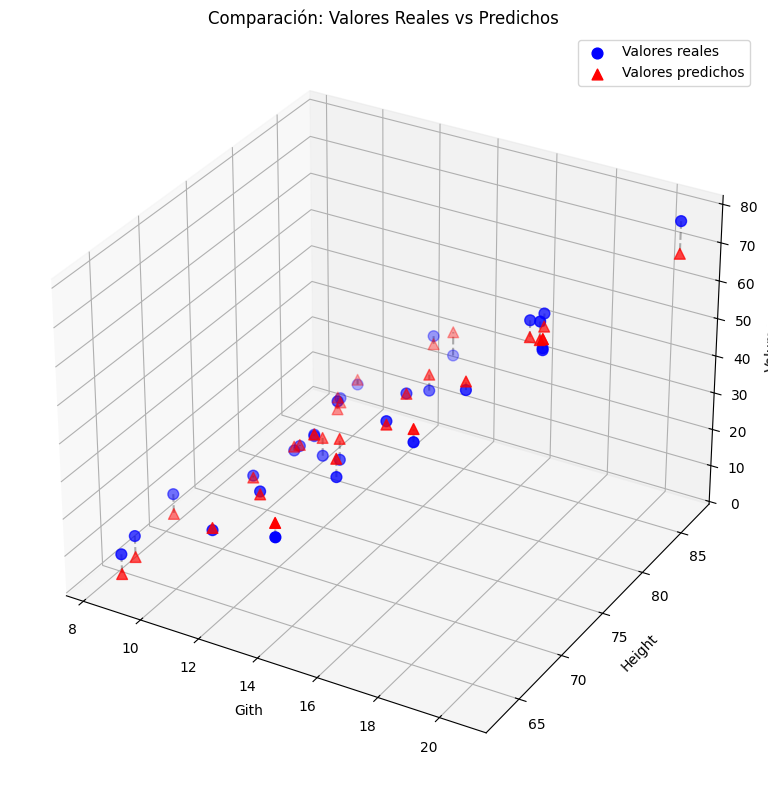

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Valores reales (azul)
ax.scatter(datos['Girth'], datos['Height'], datos['Volume'],
           c='blue', marker='o', s=60, label='Valores reales')

# Valores predichos (rojo)
ax.scatter(datos['Girth'], datos['Height'], datos['y_pred'],
           c='red', marker='^', s=60, label='Valores predichos')

# Conectar puntos reales con predichos
for i in range(len(datos)):
    ax.plot([datos['Girth'].iloc[i], datos['Girth'].iloc[i]],
            [datos['Height'].iloc[i], datos['Height'].iloc[i]],
            [datos['Volume'].iloc[i], datos['y_pred'].iloc[i]],
            'k--', alpha=0.3)

ax.set_xlabel('Gith')
ax.set_ylabel('Height')
ax.set_zlabel('Volume')
ax.set_title('Comparación: Valores Reales vs Predichos')
ax.legend()

plt.tight_layout()
plt.show()